# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Julie Kickstein

Datum: 17.11.2023

Gruppe: 99

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich das Newtonsche Abkühlungsgesetz mittels der Temperaturmessung von heißem Wasser und der Ungebungstemperatur über 10 minuten bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


![Versuchsaufbau](figures/newton.jpeg)

Für den Versuch wird ein Behälter mit 300 ml heißem Wasser befüllt. Ein Sensor misst die Temperatur des heißen Wassers, der andere zeitgleich die Umgebungstemperatur.

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [4]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_capacity = "/home/jovyan/work/calorimetry_home/data/newton/20231118_Kalorimetrie_99_Julie Kickstein.h5"

# DONE #

In [5]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5py.File(path_capacity, 'r') as f:
    capacity_data = f["RawData"]
    dataset_capacity = {}
    
    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key]
        
        attributes = dict(uuid_group.attrs)
        
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['timestamp'][:]
        
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'timestamp': time_data
        }
    
    

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

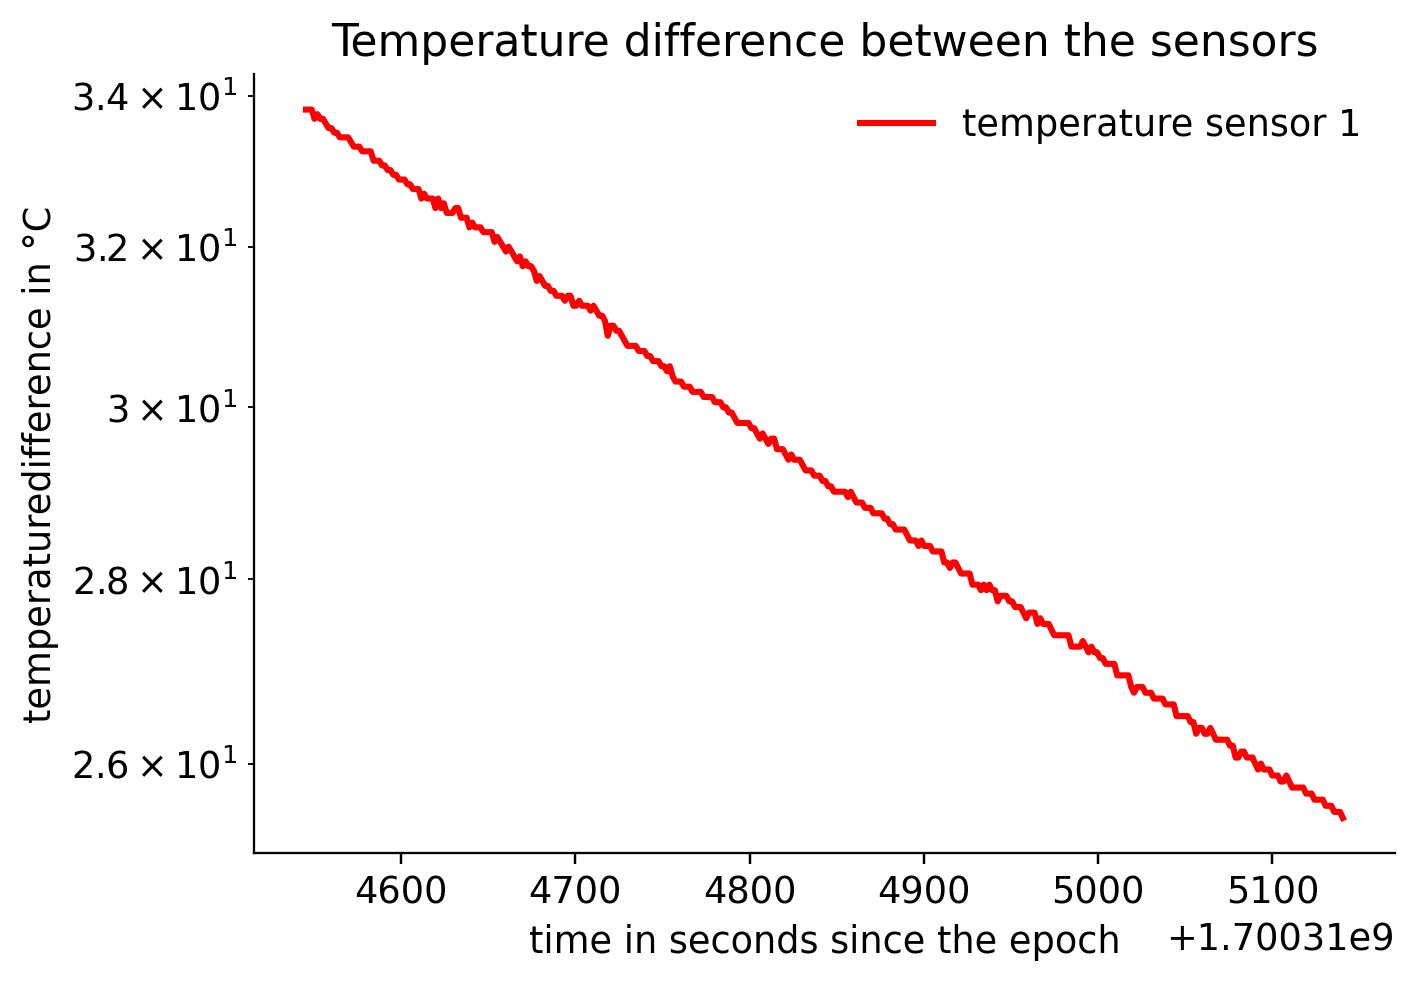

In [31]:
# TODO: Use the temperature and time data for plotting


# Daten von Sensor 1, Umgebungstemperatur
uuid_1_data = dataset_capacity['1ee822cb-e29f-6a7f-8e1f-ecc9f433cf9e']
time_data_1 = uuid_1_data['timestamp']
temperature_data_1 = uuid_1_data['temperature']

# Daten von Sensor 2, Temperatur des heißen Wassers
uuid_2_data = dataset_capacity['1ee822cc-8cfc-68bc-bdcb-5fcdd9fe6243']
time_data_2 = uuid_2_data['timestamp']
temperature_data_2 = uuid_2_data['temperature']

# Bestimmen der Temperaturdifferenz
temp_diff = temperature_data_2 - temperature_data_1

# Plotten der Daten
plt.semilogy(time_data_1, temp_diff, label='temperature sensor 1', linewidth=2, color='red')

plt.title('Temperature difference between the sensors')
plt.xlabel('time in seconds since the epoch')
plt.ylabel('temperaturedifference in °C')
plt.legend()
plt.show()


# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [29]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

start_temp_2 = temperature_data_2[0]
end_temp_2 = temperature_data_2[-1]



T_2 = end_temp_2
T_1 = start_temp_2

import numpy as np

# Temperatur- und Zeitwerte in arrays formatieren
temp_ar = np.array(temperature_data_2)
time_ar = np.array(time_data_2)

# Koeffizienten mittels np.polyfit ermitteln, Grad des Polynoms ist 1
koeffizienten = np.polyfit(time_ar,temp_ar,1)

# Koeffizienten extrahieren
K = koeffizienten[0]

# DONE #

#### (iV) Ergebnis

In [35]:
# TODO: Print result

print('Der Abkühlungskoeffizient K beträgt',K)

# DONE #

Der Abkühlungskoeffizient K beträgt -0.014122025608212518


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der Abkühlungskoeffizient von -0,014122025608212518 bedeuten, dass das Material um etwa 0,014 Grad Celsius pro Grad Celsius Temperaturänderung abkühlt. Wenn der Abkühlungskoeffizient konstant ist, sollte er tatsächlich negativ sein, um die Tatsache zu reflektieren, dass das Objekt Wärme an die Umgebung verliert. Damit ist das Newtonsche Abkühlungsgesetz bestätigt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch an sich hat Spaß gemacht, jedoch war der Aufwand für die ganze Aufgabe sehr hoch.